# Reproduce Figure 3 in Gaillard et al. 2014

This notebook uses my code to (mostly) reproduce Figure 3 in Gaillard et al. 2014.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('/')
from functions import *

In [2]:
mCO2tot=600e-6
mH2Otot=1000e-6

x = 0.01550152865954013
# molar mass in g/mol
M_H2O = 18.01528
M_CO2 = 44.01
# calculate mol fraction of CO2 and H2O in the magma
xCO2tot=(mCO2tot/M_CO2)/x
xH2Otot=(mH2Otot/M_H2O)/x



# set total pressure and temperature
n = 100
T = 1473 # kelvin
FMQ = -1.4
PP = np.logspace(-6,3,n)

H2O = []
H2 = []
CO2 = []
CO = []
CH4 = []
xx_CO2 = []
xx_H2O = []
ff_O2 = []
for i in range(0,n):
    P = PP[i]
    # set the Oxygen fugacity to FMQ
    A = 25738
    B = 9
    C = 0.092
    log_FMQ = (-A/T+B+C*(P-1)/T)
    f_O2 = 10**(log_FMQ+FMQ)
    # set to FMQ
    
    ff_O2.append(f_O2)


    P_H2O,P_H2,P_CO2,P_CO,P_CH4,alphaG,x_CO2,x_H2O = solve_gases(T,P,f_O2,mCO2tot,mH2Otot)
    
    
    H2O.append(P_H2O)
    H2.append(P_H2)
    CO2.append(P_CO2)
    CO.append(P_CO)
    CH4.append(P_CH4)
    xx_H2O.append(x_H2O)
    xx_CO2.append(x_CO2)
    
    

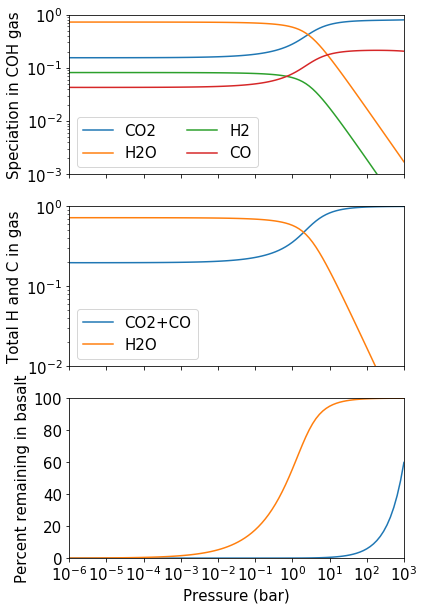

In [3]:
# plot results in similar format to Gaillard 2014 Fig 3
C_tot = (np.array(CO2)+np.array(CO))/PP
H2O_tot = np.array(H2O)/PP


# comment or uncomment the things you want to plot
plt.rcParams.update({'font.size': 15})
fig,[ax0,ax,ax1] = plt.subplots(3,1,figsize=[6,10],sharex=True)
ax0.plot(PP,np.array(CO2)/PP,label='CO2')
ax0.plot(PP,np.array(H2O)/PP,label='H2O')
ax0.plot(PP,np.array(H2)/PP,label='H2')
#ax0.plot(PP,np.array(CH4)/PP,label='CH4')
ax0.plot(PP,np.array(CO)/PP,label='CO')
ax0.set_ylim(1e-3,1e0)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylabel('Speciation in COH gas')
ax0.legend(ncol=2)


ax.plot(PP,(np.array(CO2)+np.array(CO))/PP,label='CO2+CO')
ax.plot(PP,np.array(H2O)/PP,label='H2O')
ax.set_ylim(1e-2,1e0)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Total H and C in gas')
ax.legend()


ax1.plot(PP,np.array(xx_CO2)/xCO2tot*100)
ax1.plot(PP,np.array(xx_H2O)/xH2Otot*100)
ax1.set_xscale('log')
ticks = 10**(np.arange(-6.,4.,1))
ax1.set_xticks(ticks)
ax1.set_xlabel('Pressure (bar)')
ax1.set_ylabel('Percent remaining in basalt')
ax1.set_xlim(1e-6,1e3)
ax1.set_ylim(0,100)

#plt.savefig("Gaillard_fig3_reproduce.pdf",bbox_inches='tight')
plt.show()

There are some differences between this plot and Figure 3 in Gaillard 2014. This is because he considers a COHS system, and I consider a COH system.